In [1]:
# EE559 HW 1
# Author : Creed Wallace Reilly
# Date: 05/31/2021

In [2]:
# Package Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as skn
import sklearn.metrics as met
import math

In [3]:
# Question 1 - Simple Average KNN

In [4]:
# Define sample array & input
sample_heights = np.array([150,155,165,190]);
knn = 3;

# sample_heights = np.array([171,168,191,182,150,178]) 
# knn = 1; # Debugging - if I input heights and put k = 1, I should get weight exactly...

d = {'Person': [1,2,3,4,5,6], 'Height':[171,168,191,182,150,178], 'Weight':[80,78,100,80,65,83]}; # height in cm, weight in kg
q1DF = pd.DataFrame(data=d); # create DataFrame for training data
print(q1DF) # print for verification that data input is correct

print('\nTest Pairs, KNN = ', knn, '\n')

# Calculate KNN for each sample
l = len(q1DF['Height']); # define length of the training DataFrame
k = np.arange(knn); # define k closest neighbors we want to use
increment = np.arange(len(sample_heights)); # create array for array index for for loop below
weight_est = np.zeros(len(sample_heights)); # create array to capture weight estimates

for i in increment: # for loop for all samples
    neighbors = np.array(abs(q1DF['Height']-sample_heights[i]).sort_values());
    y = 0 # define scalar sum for y1+...+yk, reinitialize for each sample
    
    for j in k: # find the k closest neighbors
        y = y + float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']); # calculate sum(y1...yk)
        
    weight_est[i] = y/len(k); # calculate the estimated weight for each sample height
    print('[', sample_heights[i], ' cm , ', round(weight_est[i],2), ' kg]')

   Person  Height  Weight
0       1     171      80
1       2     168      78
2       3     191     100
3       4     182      80
4       5     150      65
5       6     178      83

Test Pairs, KNN =  3 

[ 150  cm ,  74.33  kg]
[ 155  cm ,  74.33  kg]
[ 165  cm ,  80.33  kg]
[ 190  cm ,  87.67  kg]


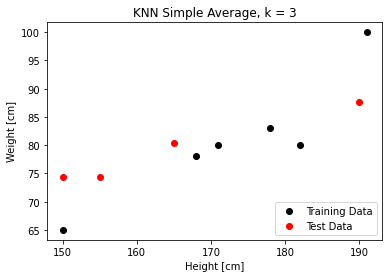

In [5]:
# Plotting the Data

x = np.array(q1DF['Height']);
y = np.array(q1DF['Weight']);
plt.scatter(x,y,c='black');

plt.scatter(sample_heights,weight_est,c='red');
title = 'KNN Simple Average, k = ' + str(knn); 
plt.title(title); # Define plot title
plt.xlabel('Height [cm]'); # X Axis label
plt.ylabel('Weight [cm]'); # Y Axis label
plt.legend(['Training Data','Test Data'],loc='lower right'); # Legend label & coloring


In [6]:
# Question 2 - Weighted KNN

In [7]:
# Using same dataframe, test points and KNN value from previous question

# Calculate KNN for each sample
l = len(q1DF['Height']); # define length of the training DataFrame
k = np.arange(knn); # define k closest neighbors we want to use
increment = np.arange(len(sample_heights)); # create array for array index for for loop below
weight_est = np.zeros(len(sample_heights)); # create array to capture weight estimates

for i in increment: # for loop for all samples
    neighbors = np.array(abs(q1DF['Height']-sample_heights[i]).sort_values());
    y = 0; # define scalar sum for y1+...+yk, reinitialize for each sample
    w = 0; # define scalar sum for w1+...+wk, reinitialize for each sample
    
    for j in k: # find the k closest neighbors
        if neighbors[j] == 0:
            y = float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']); # limit of weight -> inf
            w = 1;
            break;
        y = y + (1/neighbors[j])*float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']); # calculate sum(y1...yk)
        w = w + (1/neighbors[j]); # calculate sum(w1...wk)
        
    weight_est[i] = y/w; # calculate the estimated weight for each sample height
    print('[', sample_heights[i], ' cm , ', round(weight_est[i],2), ' kg]')

[ 150  cm ,  65.0  kg]
[ 155  cm ,  70.71  kg]
[ 165  cm ,  79.24  kg]
[ 190  cm ,  96.76  kg]


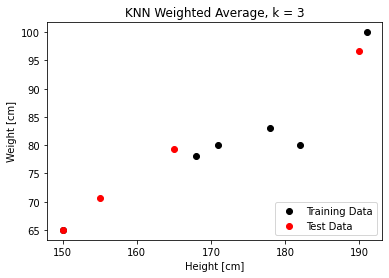

In [8]:
# Plotting the Data

x = np.array(q1DF['Height'])
y = np.array(q1DF['Weight'])
plt.scatter(x,y,c='black')

plt.scatter(sample_heights,weight_est,c='red');
title = 'KNN Weighted Average, k = ' + str(knn); 
plt.title(title); # Define plot title
plt.xlabel('Height [cm]'); # X Axis label
plt.ylabel('Weight [cm]'); # Y Axis label
plt.legend(['Training Data','Test Data'],loc='lower right'); # Legend label & coloring


In [9]:
# Question 7 Vertebral Column Data Set

In [10]:
# Part A - Dowload the data set - do I need to download both 2C and 3C?

col_2C = pd.read_csv(r'../data/column_2C.dat',names=['PI','PT','LLA','SS','PR','GoS','Label'],delim_whitespace=True);
col_2C = col_2C.replace('NO',0); # convert all NO labels to 0
col_2C = col_2C.replace('AB',1); # convert all AB labels to 1
col_2C

PI     PT    LLA     SS      PR    GoS  Label
0    63.03  22.55  39.61  40.48   98.67  -0.25      1
1    39.06  10.06  25.02  29.00  114.41   4.56      1
2    68.83  22.22  50.09  46.61  105.99  -3.53      1
3    69.30  24.65  44.31  44.64  101.87  11.21      1
4    49.71   9.65  28.32  40.06  108.17   7.92      1
..     ...    ...    ...    ...     ...    ...    ...
305  47.90  13.62  36.00  34.29  117.45  -4.25      0
306  53.94  20.72  29.22  33.22  114.37  -0.42      0
307  61.45  22.69  46.17  38.75  125.67  -2.71      0
308  45.25   8.69  41.58  36.56  118.55   0.21      0
309  33.84   5.07  36.64  28.77  123.95  -0.20      0

[310 rows x 7 columns]

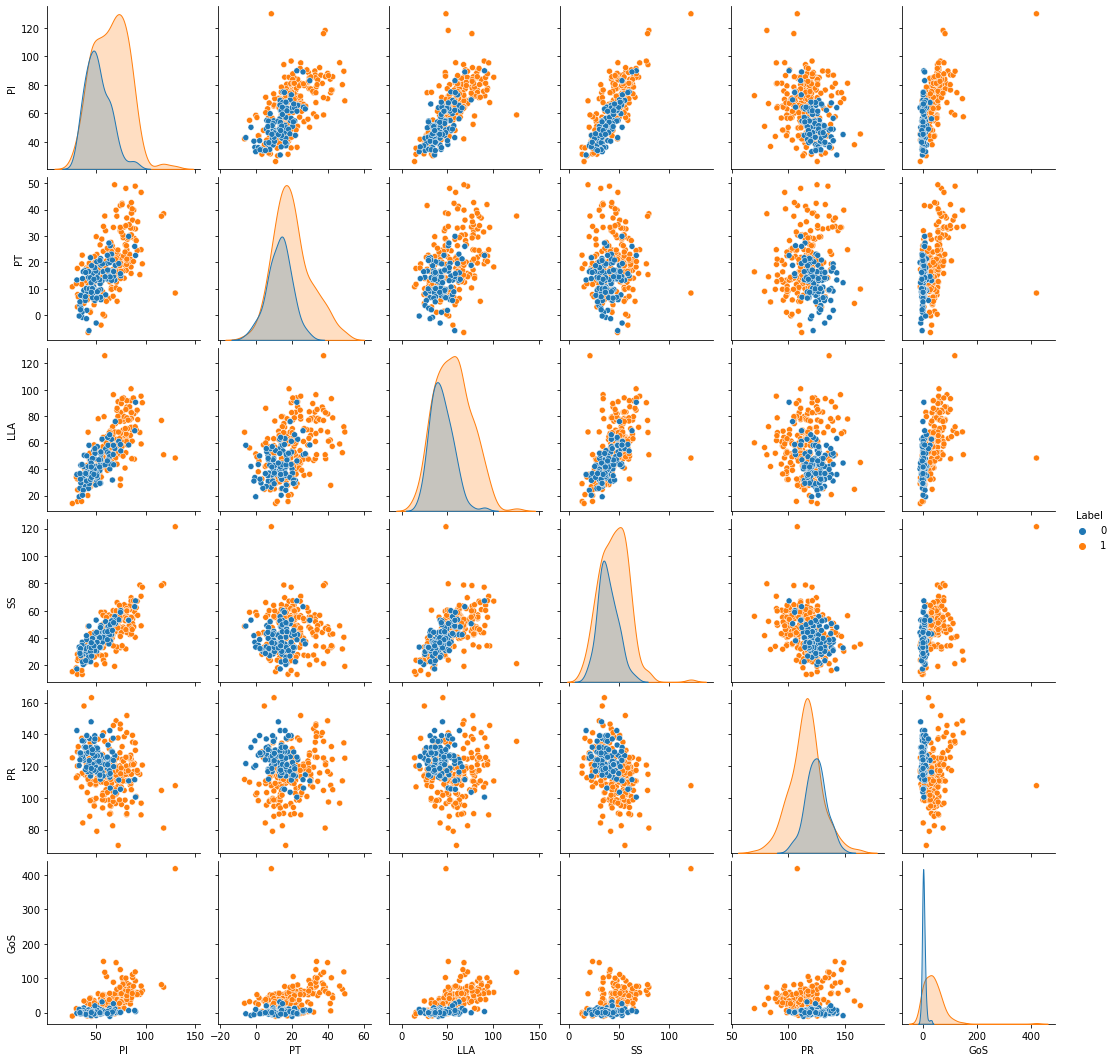

In [11]:
# Part B - Pre-Processing and Exploratory Data Analysis

# Section i
sns.pairplot(col_2C,hue='Label'); # displays scatter plots of all ind. variables against each other

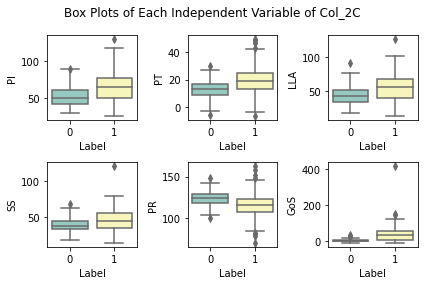

In [12]:
# Section ii - Create boxplots

figs, axs = plt.subplots(2,3)
figs.suptitle('Box Plots of Each Independent Variable of Col_2C')
sns.boxplot(x='Label',y='PI', data=col_2C, palette = 'Set3',ax=axs[0,0]);
sns.boxplot(x='Label',y='PT', data=col_2C, palette = 'Set3',ax=axs[0,1]);
sns.boxplot(x='Label',y='LLA', data=col_2C, palette = 'Set3',ax=axs[0,2]);
sns.boxplot(x='Label',y='SS', data=col_2C, palette = 'Set3',ax=axs[1,0]);
sns.boxplot(x='Label',y='PR', data=col_2C, palette = 'Set3',ax=axs[1,1]);
sns.boxplot(x='Label',y='GoS', data=col_2C, palette = 'Set3',ax=axs[1,2]);
plt.tight_layout()

In [13]:
# Section iii - creating the training set
trainSet = col_2C[col_2C['Label']== 0][0:70]; # add first 70 rows with Normal Label to training
trainSet = trainSet.append(col_2C[col_2C['Label']== 1][0:140], ignore_index=True); # add first 140 rows of Abnormal
trainSet

PI     PT    LLA     SS      PR    GoS  Label
0    38.51  16.96  35.11  21.54  127.63   7.99      0
1    54.92  18.97  51.60  35.95  125.85   2.00      0
2    44.36   8.95  46.90  35.42  129.22   4.99      0
3    48.32  17.45  48.00  30.87  128.98  -0.91      0
4    45.70  10.66  42.58  35.04  130.18  -3.39      0
..     ...    ...    ...    ...     ...    ...    ...
205  77.12  30.35  77.48  46.77  110.61  82.09      1
206  88.02  39.84  81.77  48.18  116.60  56.77      1
207  83.40  34.31  78.42  49.09  110.47  49.67      1
208  72.05  24.70  79.87  47.35  107.17  56.43      1
209  85.10  21.07  91.73  64.03  109.06  38.03      1

[210 rows x 7 columns]

In [14]:
# Section iii - creating the test set
testSet = col_2C[col_2C['Label']== 0][70:];
testSet = testSet.append(col_2C[col_2C['Label']== 1][140:], ignore_index=True);
testSet

PI     PT    LLA     SS      PR     GoS  Label
0   50.09  13.43  34.46  36.66  119.13    3.09      0
1   64.26  14.50  43.90  49.76  115.39    5.95      0
2   53.68  13.45  41.58  40.24  113.91    2.74      0
3   49.00  13.11  51.87  35.88  126.40    0.54      0
4   59.17  14.56  43.20  44.60  121.04    2.83      0
..    ...    ...    ...    ...     ...     ...    ...
95  80.11  33.94  85.10  46.17  125.59  100.29      1
96  95.48  46.55  59.00  48.93   96.68   77.28      1
97  74.09  18.82  76.03  55.27  128.41   73.39      1
98  87.68  20.37  93.82  67.31  120.94   76.73      1
99  48.26  16.42  36.33  31.84   94.88   28.34      1

[100 rows x 7 columns]

In [15]:
# Part F - Find lowest training rate for the entire homework

# initialize HW error counter, add if statments to each section to capture a lower error, if possible. Not including the
# training error for the training set as that error is 0 when k = 1 (doesn't count!)

errorQ7 = 1;


In [16]:
# Part C - Classification of KNN on Vertebral Column Data Set

# Section i
# skn.KNeighborsClassifier() will provide the K-nearest neighbors in the Euclidean metric when p = 2, metric = 'minkowski'

# Section ii
# Define k array
i = np.arange(70) # defines counter for for-loop and incrementer for k
k = 3*i + 1; # creates array k = [1,4,7,...,205,208]
k = k[::-1]; # flips the array to k = [208,205,...,7,4,1]
yTest_true = testSet['Label'];
testPredict = np.zeros(([len(testSet['Label']),len(i)]));
trainPredict = np.zeros(([len(trainSet['Label']),len(i)]));

errorTest = np.zeros([len(i),1]);
errorTrain = np.zeros([len(i),1]);

# Define Euclidean distance KNN class, train class with training set for each k-value
for j in i:
    KNN = skn.KNeighborsClassifier(n_neighbors = k[j],p=2,metric='minkowski');
    X = trainSet[['PI','PT','LLA','SS','PR','GoS']]; # define training inputs
    y = trainSet['Label']; # define training outputs
    KNN.fit(X,y) # create KNN class that will fit based on training data

    # Run training set through the KNN class to see error
    trainPredict[:,j] = KNN.predict(X);
    errorTrain[j] = float(sum(abs(trainPredict[:,j]-y))/len(y))
    
    # Predict Labels for the test set
    Z = testSet[['PI','PT','LLA','SS','PR','GoS']]; # create testSet matrix
    testPredict[:,j] = KNN.predict(Z); # store predicted test output from test inputs
    errorTest[j] = float(sum(abs(testPredict[:,j]-yTest_true))/len(yTest_true)) # calculate # misclassifiers

if errorTest.min() < errorQ7: # check for min error in this section of HW
    errorQ7 = errorTest.min()

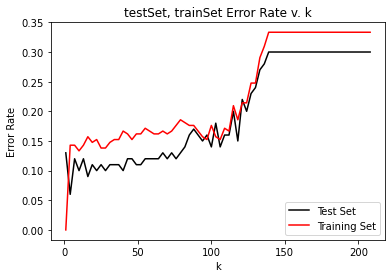

In [17]:
# Plot the data
plt.plot(k,errorTest,c='black'); # plot the testSet error in black
plt.plot(k,errorTrain,c='red'); # plot the trainSet error in red (1/k = 1 should == 0 error)
plt.xlabel('k');
plt.ylabel('Error Rate');
plt.title('testSet, trainSet Error Rate v. k');
plt.legend(['Test Set','Training Set'],loc='lower right');

In [18]:
# Calculate the confusion mx, true positive rate, true negative rate, precision, and F1-score when k = k*

# Calculate k*
index_min = np.argmin(errorTest);# returns the index of the lowest error; same index of k*
kstar = k[index_min];
print('K-Nearest Neighbors K* = ',kstar)

# Calculate the Confusion Matrix
cf = met.confusion_matrix(yTest_true,testPredict[:,index_min]);
print('Confusion Matrix = \n', cf)

# Calculate true positive rate (TPR) and true negative rate (TNR)
    # Following code/process was researched on Stack Overflow.
FP = (cf.sum(axis=0) - np.diag(cf)).astype(float);
TP = (np.diag(cf)).astype(float);
FN = (cf.sum(axis=1) - np.diag(cf)).astype(float);
TN = (cf.sum() - (FP + FN + TP)).astype(float);

TPR = TP/(TP + FN); # (true recorded positives)/(all actual positives) - also recall
print('True Positive Rate (TPR) = ', TPR)
TNR = TN/(TN + FP); # (true recorded negatives)/(all actual negatives)
print('True Negative Rate (TNR) = ', TNR)

# Calculate precision
Precision = TP/(TP + FP); #  (true positives)/(all positives)
print('Precision = ', Precision)

# Calculate F1-score
F1 = 2*(Precision*TPR)/(Precision + TPR);
print('F1-score = ', F1)

K-Nearest Neighbors K* =  4
Confusion Matrix = 
 [[25  5]
 [ 1 69]]
True Positive Rate (TPR) =  [0.83333333 0.98571429]
True Negative Rate (TNR) =  [0.98571429 0.83333333]
Precision =  [0.96153846 0.93243243]
F1-score =  [0.89285714 0.95833333]


In [19]:
# Section iii - finding the best error rate given training set size

# Define N for-loop counters
i = np.arange(21) # create increment for N for-loop and slope for N
N = 10*i+10; # create array for N
errorN = np.ones([len(N),1]); # create array for min error at a given N
errork_ind = np.zeros([len(N),1]); # create array to capture minimum k value for a given N value

for u in i: # for loop for testSet of size N
    # Define k for-loop counters
    j = np.arange(math.floor(N[u]/5)); # create increment for k for-loop and slope for k, not to exceed N
    k1 = 5*j + 1; # create array for k
    errork = np.ones([len(k1),1]); # create array for min error as function of k for a given N

    # Define training set -> N/3 rows of class 0 and (N-N/3) of class 1
    trainSet = col_2C[col_2C['Label']== 0][0:math.floor(N[u]/3)]; # add first N/3 rows with Normal Label to training
    trainSet = trainSet.append(col_2C[col_2C['Label']== 1][0:(N[u]-math.floor(N[u]/3))], ignore_index=True); # add first N-N/3 rows of Abnormal
    
    # Define test set with remaining values
    testSet = col_2C[col_2C['Label']== 0][math.floor(N[u]/3):];
    testSet = testSet.append(col_2C[col_2C['Label']== 1][(N[u]-math.floor(N[u]/3)):], ignore_index=True);
    
    # Perform KNN for each N value for k in {1,6,11,...,<=N}
    yTest_true = testSet['Label'];
    testPredict = np.zeros(([len(testSet['Label']),1]));
    trainPredict = np.zeros(([len(trainSet['Label']),1]));
    
    # Define Euclidean distance KNN class, train class with training set for each k-value
    for w in j:
        # Define KNN class based on training set
        KNN = skn.KNeighborsClassifier(n_neighbors = k1[w],metric='euclidean');
        X = trainSet[['PI','PT','LLA','SS','PR','GoS']]; # define training inputs
        y = trainSet['Label']; # define training outputs
        KNN.fit(X,y) # create KNN class that will fit based on training data

        # Predict Labels for the test set
        Z = testSet[['PI','PT','LLA','SS','PR','GoS']]; # create testSet matrix
        testPredict = KNN.predict(Z); # store predicted test output from test inputs
        errork[w] = float(sum(abs(testPredict-yTest_true))/len(yTest_true)) # calculate # misclassifiers
    errorN[u]=errork.min()
    index_min1 = np.argmin(errork);# returns the index of the lowest error; same index of k*
    errork_ind[u] = k1[index_min1]

if errorN.min() < errorQ7: # check for min error in this section of HW
    errorQ7 = errorN.min()

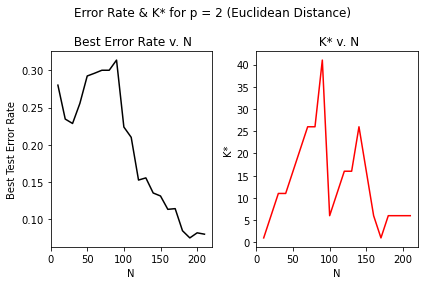

In [20]:
# Plot the data - maybe clean this up and put on one graph with 2 axes? NIT
figs, axs = plt.subplots(1,2)
figs.suptitle('Error Rate & K* for p = 2 (Euclidean Distance)')
axs[0].plot(N,errorN,c='black'); # plot the optimum error as a function of N
axs[0].set_xlabel('N');
axs[0].set_ylabel('Best Test Error Rate');
axs[0].set_title(' Best Error Rate v. N');

axs[1].plot(N,errork_ind,c='red'); # plot k* as a function of N
axs[1].set_xlabel('N');
axs[1].set_ylabel('K*');
axs[1].set_title(' K* v. N');

plt.tight_layout()

In [21]:
# Part D - replacing euclidean metric with other metrics

# Section i, subsection A - Manhatten Distance (Minkowski, p = 1)

# Define N for-loop counters
i = np.arange(21) # create increment for N for-loop and slope for N
N = 10*i+10; # create array for N
errorN1 = np.ones([len(N),1]); # create array for min error at a given N
errork_ind1 = np.zeros([len(N),1]); # create array to capture minimum k value for a given N value

for u in i: # for loop for testSet of size N
    # Define k for-loop counters
    j = np.arange(math.floor(N[u]/5)); # create increment for k for-loop and slope for k, not to exceed N
    k1 = 5*j + 1; # create array for k
    errork1 = np.ones([len(k1),1]); # create array for min error as function of k for a given N

    # Define training set -> N/3 rows of class 0 and (N-N/3) of class 1
    trainSet = col_2C[col_2C['Label']== 0][0:math.floor(N[u]/3)]; # add first N/3 rows with Normal Label to training
    trainSet = trainSet.append(col_2C[col_2C['Label']== 1][0:(N[u]-math.floor(N[u]/3))], ignore_index=True); # add first N-N/3 rows of Abnormal
    
    # Define test set with remaining values
    testSet = col_2C[col_2C['Label']== 0][math.floor(N[u]/3):];
    testSet = testSet.append(col_2C[col_2C['Label']== 1][(N[u]-math.floor(N[u]/3)):], ignore_index=True);
    
    # Perform KNN for each N value for k in {1,6,11,...,<=N}
    yTest_true = testSet['Label'];
    testPredict = np.zeros(([len(testSet['Label']),1]));
    trainPredict = np.zeros(([len(trainSet['Label']),1]));
    
    # Define Manhattan distance KNN class, train class with training set for each k-value
    for w in j:
        # Define KNN class based on training set
        KNN = skn.KNeighborsClassifier(n_neighbors = k1[w],p=1, metric='minkowski');
        X = trainSet[['PI','PT','LLA','SS','PR','GoS']]; # define training inputs
        y = trainSet['Label']; # define training outputs
        KNN.fit(X,y) # create KNN class that will fit based on training data

        # Predict Labels for the test set
        Z = testSet[['PI','PT','LLA','SS','PR','GoS']]; # create testSet matrix
        testPredict = KNN.predict(Z); # store predicted test output from test inputs
        errork1[w] = float(sum(abs(testPredict-yTest_true))/len(yTest_true)) # calculate # misclassifiers
    errorN1[u]=errork1.min()
    index_min1 = np.argmin(errork1);# returns the index of the lowest error; same index of k*
    errork_ind1[u] = k1[index_min1]
    
    # print('N = ', N[u], ' , BER = ', errorN1[u])

    # capture data for future parts of problem
    if N[u] == 200:
        train200 = trainSet;
        test200 = testSet;
        testPre200 = testPredict;  
        k200 = k1;
        n = N[u]; # capture n value
        error200 = errorN1[u];
        ind200 = index_min1;
        k200star = k1[index_min1];
        yTrue200 = yTest_true;

if errorN1.min() < errorQ7: # check for min error in this section of HW
    errorQ7 = errorN1.min()


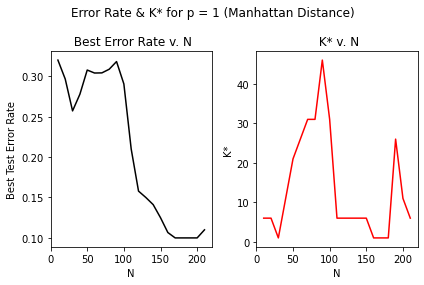

In [22]:
# Plot the data
figs, axs = plt.subplots(1,2)
figs.suptitle('Error Rate & K* for p = 1 (Manhattan Distance)')
axs[0].plot(N,errorN1,c='black'); # plot the optimum error as a function of N
axs[0].set_xlabel('N');
axs[0].set_ylabel('Best Test Error Rate');
axs[0].set_title(' Best Error Rate v. N');

axs[1].plot(N,errork_ind1,c='red'); # plot k* as a function of N
axs[1].set_xlabel('N');
axs[1].set_ylabel('K*');
axs[1].set_title(' K* v. N');

plt.tight_layout()

In [23]:
# Section i, subsection B - log10(p) = {0.1:0.1:1.1}

i = np.arange(10);
log10p = 0.1 + 0.1*i;
pp = 10**log10p; # define p metric for KNN
errorp = np.ones([len(i),1]); # create array for min error as function of k for a given N

X = train200[['PI','PT','LLA','SS','PR','GoS']]; # define training inputs
y = train200['Label']; # define training outputs
Z = test200[['PI','PT','LLA','SS','PR','GoS']]; # create testSet matrix

for u in i:

    # Define KNN class based on training set
    KNN = skn.KNeighborsClassifier(n_neighbors = k200star,p=pp[u],metric='minkowski');
    KNN.fit(X,y) # create KNN class that will fit based on training data

    # Predict Labels for the test set
    testPredict = KNN.predict(Z); # store predicted test output from test inputs
    errorp[u] = float(sum(abs(testPredict-yTrue200))/len(yTrue200)) # calculate # misclassifiers
    
if errorp.min() < errorQ7: # check for min error in this section of HW
    errorQ7 = errorp.min()

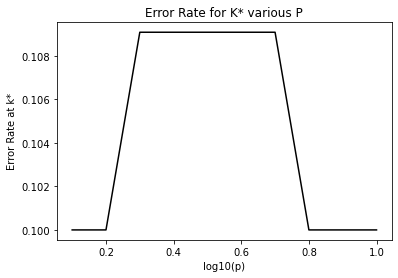

In [24]:
# Plot the data
plt.plot(log10p,errorp,c='black'); # plot error rate as a function of log10p 
plt.xlabel('log10(p)');
plt.ylabel('Error Rate at k*');
plt.title('Error Rate for K* various P');


In [25]:
# Section i, subsection C

# Define KNN class based on training set
KNN = skn.KNeighborsClassifier(n_neighbors = k200star,metric='chebyshev');
KNN.fit(X,y) # create KNN class that will fit based on training data

# Predict Labels for the test set
testPredict = KNN.predict(Z); # store predicted test output from test inputs
errorCheb = float(sum(abs(testPredict-yTrue200))/len(yTrue200)) # calculate # misclassifiers

print('Chebyshev Error at (N=200, k*) = ', errorCheb)

if errorCheb < errorQ7: # check for min error in this section of HW
    errorQ7 = errorCheb

Chebyshev Error at (N=200, k*) =  0.10909090909090909


In [26]:
# Section ii
# metric_params = {'V': np.cov(X)})
# Define KNN class based on training set

# Edit - had a lot of issues getting this to work. Solution here:
# https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#34650347
KNN = skn.KNeighborsClassifier(algorithm = 'brute', n_neighbors = k200star,metric='mahalanobis',metric_params = {'VI': np.cov(X)});
KNN.fit(X,y) # create KNN class that will fit based on training data

# Predict Labels for the test set
testPredict = KNN.predict(Z); # store predicted test output from test inputs
errorMah = float(sum(abs(testPredict-yTrue200))/len(yTest_true)) # calculate # misclassifiers

if errorMah < errorQ7: # check for min error in this section of HW
    errorQ7 = errorMah;
    
print('Mahalanobis Error at (N=200, k*) = ', errorMah)

Mahalanobis Error at (N=200, k*) =  0.3


In [27]:
# Print the table of the results

tableOut = pd.DataFrame(); # create table dataframe for output

# distance = np.array['Manhattan','log(10)p','Chebyshev','Mahalanobis']
tableOut['Distance Type'] = ['Manhattan','log(10)p','Chebyshev','Mahalanobis']
tableOut['k* Error'] = [errorN1.min(), errorp.min(), errorCheb, errorMah]
tableOut

Distance Type  k* Error
0     Manhattan  0.100000
1      log(10)p  0.100000
2     Chebyshev  0.109091
3   Mahalanobis  0.300000

In [28]:
# Part E - Weighted Decision KNN
classifier = ['euclidean','manhattan','chebyshev']
i = np.arange(3);
errorE = np.ones([3,1]);

j = np.arange(len(k200)); # create increment for various k-values
for u in i: # for loop for each type of distance (classifier)
    for v in j: # for loop for k in {1:5:196}
        # Define KNN class based on training set
        KNN = skn.KNeighborsClassifier(n_neighbors = k200[v], weights = 'distance', metric=classifier[u]);
        KNN.fit(X,y) # create KNN class that will fit based on training data

        # Predict Labels for the test set
        testPredict = KNN.predict(Z); # store predicted test output from test inputs
        tError = float(sum(abs(testPredict-yTrue200))/len(yTrue200)) # calculate # misclassifiers
        if tError < errorE[u]:
            errorE[u] = tError; # capture the minimum error

    print('Best Test Error for ', classifier[u], ' distance = ', errorE[u])

if errorE.min() < errorQ7: # check for min error in this section of HW
    errorQ7 = errorE.min()

Best Test Error for  euclidean  distance =  [0.1]
Best Test Error for  manhattan  distance =  [0.09090909]
Best Test Error for  chebyshev  distance =  [0.1]


In [29]:
# Part F - Report the minimal error

print('Minimum Error in HW1, Q7 = ', errorQ7)


Minimum Error in HW1, Q7 =  0.06
